In [1]:
import sys
sys.path.append('..')

from src.data_loader import SupabaseDataLoader, quick_load_sample
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 100)
sns.set_style('whitegrid')

print("✅ Imports réussis")

✅ Imports réussis


In [3]:
# Cellule 2 : Charger un échantillon
loader = SupabaseDataLoader()

# Charger un échantillon de 5000 messages
df = loader.load_date_range(start_date="2025-01-01", end_date="2025-09-01")

print(f"📊 Dataset chargé : {len(df)} messages")
print(f"📅 Période : {df['created_at'].min()} → {df['created_at'].max()}")
print(f"👥 Utilisateurs uniques : {df['user_id'].nunique()}")

INFO:src.data_loader:✅ Connexion Supabase établie
INFO:httpx:HTTP Request: POST https://vetoswvwgsebhxetqppa.supabase.co/storage/v1/object/list/raw-messages-archive "HTTP/2 200 OK"
INFO:src.data_loader:📁 100 dossiers trouvés dans messages/
INFO:src.data_loader:📅 Chargement de 0 dossiers de dates


📊 Dataset chargé : 0 messages


KeyError: 'created_at'

In [7]:
# Cellule 3 : Aperçu des données
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   224 non-null    object             
 1   created_at           224 non-null    datetime64[ns, UTC]
 2   user_id              224 non-null    object             
 3   chat_provider_id     224 non-null    object             
 4   message_provider_id  224 non-null    object             
 5   role                 224 non-null    object             
 6   model                224 non-null    object             
 7   content              224 non-null    object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 14.1+ KB


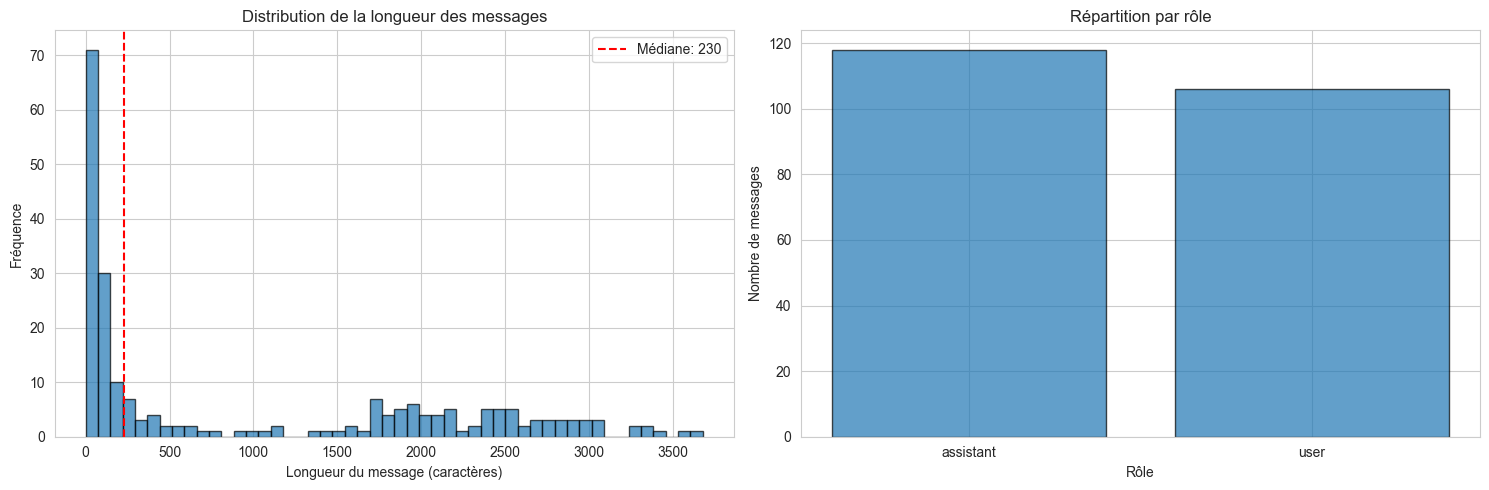


📊 Statistiques de longueur :
count     224.000000
mean      994.937500
std      1130.845097
min         0.000000
25%        51.000000
50%       230.500000
75%      2035.000000
max      3679.000000
Name: content_length, dtype: float64


In [8]:
# Cellule 4 : Statistiques descriptives
# Longueur des messages
df['content_length'] = df['content'].astype(str).str.len()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Distribution de la longueur
axes[0].hist(df['content_length'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Longueur du message (caractères)')
axes[0].set_ylabel('Fréquence')
axes[0].set_title('Distribution de la longueur des messages')
axes[0].axvline(df['content_length'].median(), color='red', linestyle='--', label=f'Médiane: {df["content_length"].median():.0f}')
axes[0].legend()

# Distribution par rôle
role_counts = df['role'].value_counts()
axes[1].bar(role_counts.index, role_counts.values, alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Rôle')
axes[1].set_ylabel('Nombre de messages')
axes[1].set_title('Répartition par rôle')

plt.tight_layout()
plt.show()

print(f"\n📊 Statistiques de longueur :")
print(df['content_length'].describe())

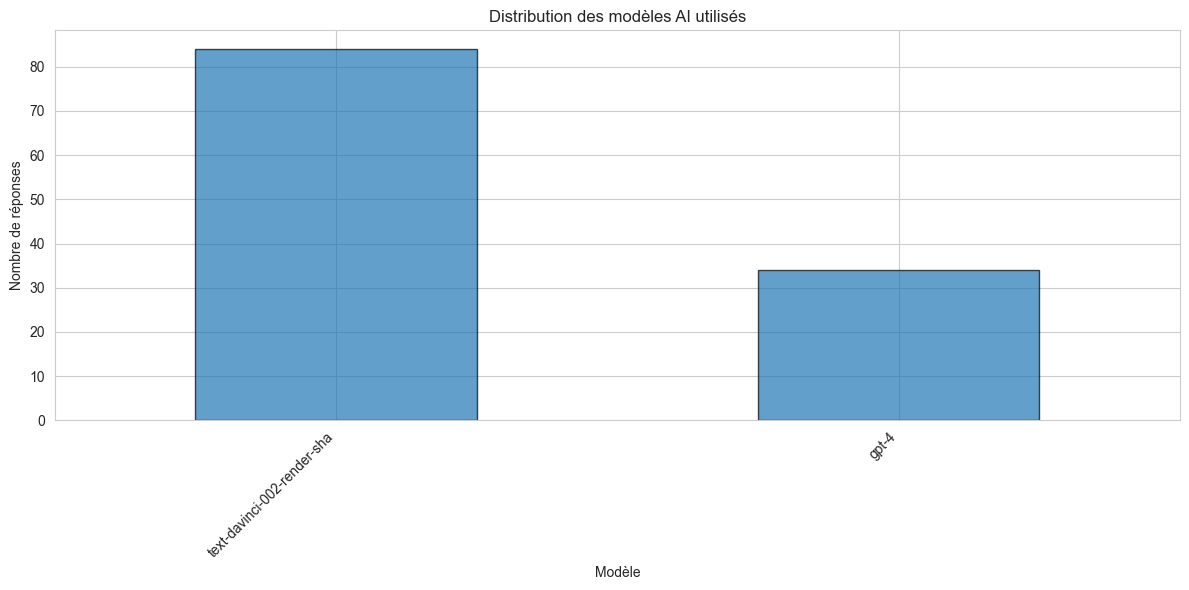


🤖 Modèles utilisés :
model
text-davinci-002-render-sha    84
gpt-4                          34
Name: count, dtype: int64


In [9]:
# Cellule 5 : Analyser les modèles utilisés
if 'model' in df.columns:
    model_distribution = df[df['role'] == 'assistant']['model'].value_counts()
    
    plt.figure(figsize=(12, 6))
    model_distribution.plot(kind='bar', edgecolor='black', alpha=0.7)
    plt.xlabel('Modèle')
    plt.ylabel('Nombre de réponses')
    plt.title('Distribution des modèles AI utilisés')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    
    print(f"\n🤖 Modèles utilisés :")
    print(model_distribution)

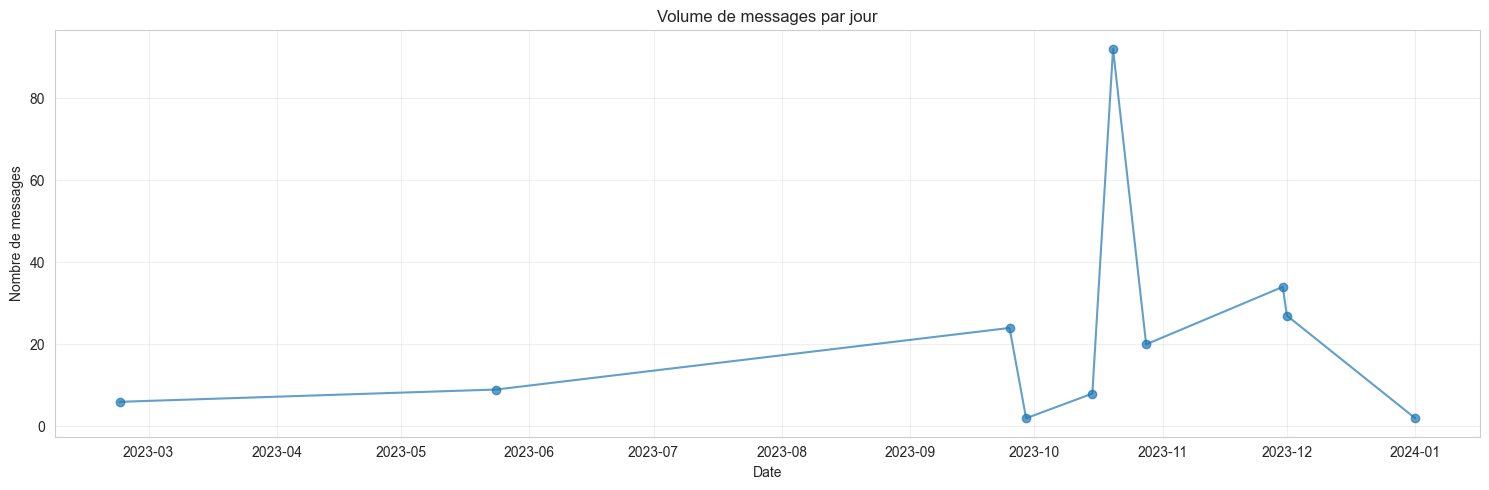


📈 Statistiques temporelles :
   Jour le plus actif : 2023-10-20 (92 messages)
   Moyenne par jour : 22.4 messages


In [10]:
# Cellule 6 : Timeline des messages
df['created_at'] = pd.to_datetime(df['created_at'])
df['date'] = df['created_at'].dt.date

messages_per_day = df.groupby('date').size()

plt.figure(figsize=(15, 5))
messages_per_day.plot(kind='line', marker='o', alpha=0.7)
plt.xlabel('Date')
plt.ylabel('Nombre de messages')
plt.title('Volume de messages par jour')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n📈 Statistiques temporelles :")
print(f"   Jour le plus actif : {messages_per_day.idxmax()} ({messages_per_day.max()} messages)")
print(f"   Moyenne par jour : {messages_per_day.mean():.1f} messages")

In [11]:
# Cellule 7 : Exemples de messages
# Messages courts
print("🔤 MESSAGES COURTS (<50 caractères) :")
print("=" * 80)
short_messages = df[df['content_length'] < 50]['content'].head(10)
for i, msg in enumerate(short_messages, 1):
    print(f"{i}. {msg}\n")

print("\n📝 MESSAGES LONGS (>2000 caractères) :")
print("=" * 80)
long_messages = df[df['content_length'] > 2000]['content'].head(3)
for i, msg in enumerate(long_messages, 1):
    print(f"{i}. {msg[:500]}...\n")  # Afficher seulement les 500 premiers caractères

🔤 MESSAGES COURTS (<50 caractères) :
1. 

2. 

3. 

4. OK.

5. 

6. 

7. 

8. 

9. Peux-tu me proposer un prompt amélioré ?

10. Parle moi du serment d'hippocrage


📝 MESSAGES LONGS (>2000 caractères) :
1. ### Partie 1 : LE PROMPT

**Prompt Optimal pour ChatGPT4 :**
- **Contexte et Objectif :** Vous êtes une IA spécialisée dans l'assistance aux ressources humaines et au droit du travail en France. Votre nom est HR Advisor.
- **Tâche :** Votre mission est d'aider les entreprises, notamment celles sous la convention collective SYNTEC, à naviguer dans leurs obligations légales en matière de ressources humaines et de droit du travail. Cela inclut la gestion du personnel, les relations sociales, et l'a...

2. ### Partie 1 : LE PROMPT

D'après les meilleures pratiques actuelles en matière de rédaction de prompts pour ChatGPT-4, voici un exemple optimisé pour votre domaine d'activité en ressources humaines et droit du travail en France :

```
ChatGPT, vous êtes un assistant juridique spéciali

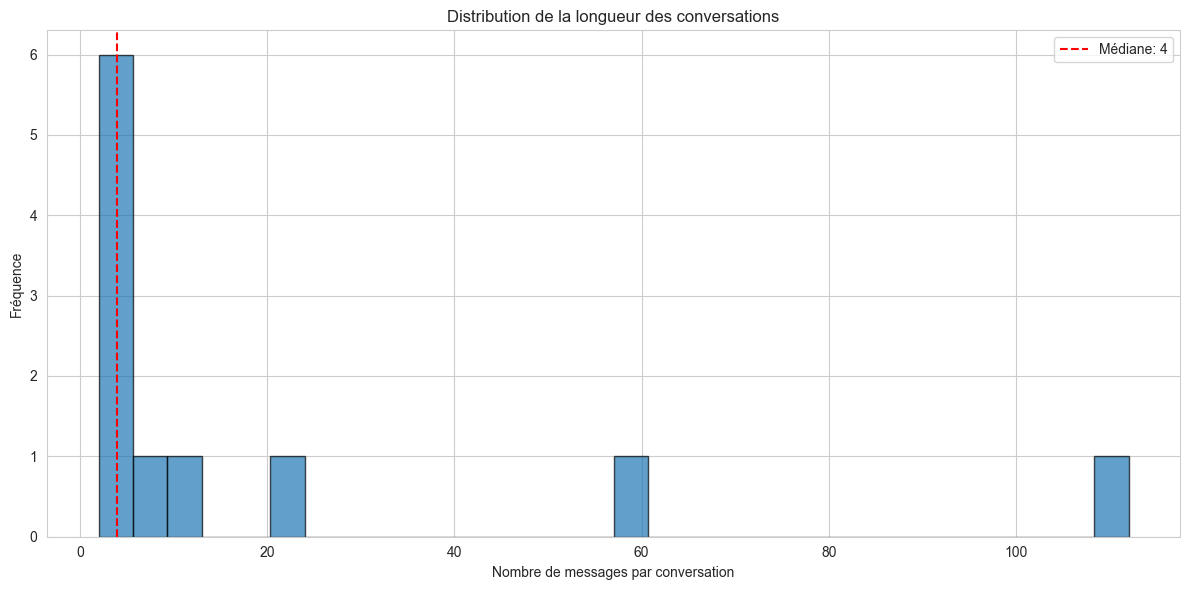


💬 Statistiques de conversation :
   Nombre de conversations : 11
   Longueur moyenne : 20.4 messages
   Longueur médiane : 4 messages
   Plus longue conversation : 112 messages


In [12]:
# Cellule 8 : Analyse des conversations
# Grouper par chat_provider_id pour voir les conversations
if 'chat_provider_id' in df.columns:
    conversation_lengths = df.groupby('chat_provider_id').size()
    
    plt.figure(figsize=(12, 6))
    plt.hist(conversation_lengths, bins=30, edgecolor='black', alpha=0.7)
    plt.xlabel('Nombre de messages par conversation')
    plt.ylabel('Fréquence')
    plt.title('Distribution de la longueur des conversations')
    plt.axvline(conversation_lengths.median(), color='red', linestyle='--', label=f'Médiane: {conversation_lengths.median():.0f}')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    print(f"\n💬 Statistiques de conversation :")
    print(f"   Nombre de conversations : {df['chat_provider_id'].nunique()}")
    print(f"   Longueur moyenne : {conversation_lengths.mean():.1f} messages")
    print(f"   Longueur médiane : {conversation_lengths.median():.0f} messages")
    print(f"   Plus longue conversation : {conversation_lengths.max()} messages")